# Visualización de datos

### Cargar librerías

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Cargar Datos

In [3]:
data = pd.read_csv("Food Share Emissions.csv")

In [4]:
data.head()

,Entity,Code,Year,Food's share of total emissions (incl. LULUFC)
0,Afghanistan,AFG,1990,78.558522
1,Afghanistan,AFG,1991,79.335651
2,Afghanistan,AFG,1992,84.268804
3,Afghanistan,AFG,1993,85.247941
4,Afghanistan,AFG,1994,86.897834


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5772 entries, 0 to 5771
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          5772 non-null   object 
 1   Code                                            5694 non-null   object 
 2   Year                                            5772 non-null   int64  
 3   Food's share of total emissions (incl. LULUFC)  5772 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 180.5+ KB


In [6]:
data.describe()

,Year,Food's share of total emissions (incl. LULUFC)
count,5772.00000,5772.000000
mean,2002.50000,119.224213
std,7.50065,4192.918610
min,1990.00000,-19724.573980
25%,1996.00000,22.204820
50%,2002.50000,46.586162
75%,2009.00000,85.203112
max,2015.00000,309631.969600


In [9]:
print('Countries: ', data['Entity'].nunique())
print('Years: ', data['Year'].nunique())

Countries:  222
Years:  26


      Food's share of total emissions (incl. LULUFC)
Year                                                
1990                                    13140.696358
1991                                    -5094.101472
1992                                    -5051.765164
1993                                    -5933.522735
1994                                    -5968.773757
1995                                    17431.453666
1996                                    16673.266191
1997                                    19879.855001
1998                                    17040.357879
1999                                    13893.540652
2000                                    16273.725101
2001                                    73743.688392
2002                                    16823.393091
2003                                    16076.087610
2004                                    15642.604297
2005                                    15368.008491
2006                                   331813.

C:\Users\Alien Ware\AppData\Local\Temp\ipykernel_20224\2197324762.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emissions_by_year = data.groupby('Year').sum()


<AxesSubplot:xlabel='Year'>

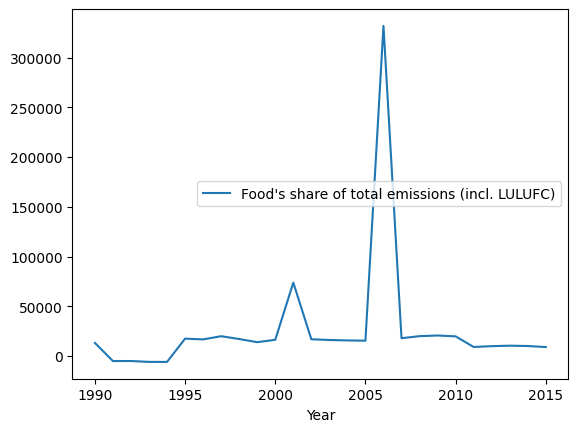

In [13]:
emissions_by_year = data.groupby('Year').sum()
print(emissions_by_year)
emissions_by_year.plot()

In [16]:
data.rename(columns={"Food's share of total emissions (incl. LULUFC)": 'emissions'}, inplace=True)

In [198]:
data[data['Code']=="OWID_SRM"]

,Entity,Code,Year,emissions
4498,Serbia and Montenegro,OWID_SRM,1990,18.067148
4499,Serbia and Montenegro,OWID_SRM,1991,20.081152
4500,Serbia and Montenegro,OWID_SRM,1992,21.584341
4501,Serbia and Montenegro,OWID_SRM,1993,23.951817
4502,Serbia and Montenegro,OWID_SRM,1994,25.107283
4503,Serbia and Montenegro,OWID_SRM,1995,23.757797
4504,Serbia and Montenegro,OWID_SRM,1996,22.641472
4505,Serbia and Montenegro,OWID_SRM,1997,21.748864
4506,Serbia and Montenegro,OWID_SRM,1998,21.846266
4507,Serbia and Montenegro,OWID_SRM,1999,27.069604


In [196]:
emissions_by_country = data.groupby('Code')['emissions'].sum()
emissions_by_country = emissions_by_country.reset_index()


In [199]:
emissions_by_country.sort_values('emissions', ascending=False, inplace=True)
emissions_by_country
f1 = emissions_by_country['Code'].head()
l1 = emissions_by_country['Code'].tail()

In [205]:
new_data_by_year_f1  = data[data['Code'].isin(f1)].groupby(['Year', 'Code'])['emissions'].sum()
new_data_by_year_f1 = new_data_by_year_f1.reset_index()
new_data_by_year_l1  = data[data['Code'].isin(l1)].groupby(['Year', 'Code'])['emissions'].sum()
new_data_by_year_l1 = new_data_by_year_l1.reset_index()

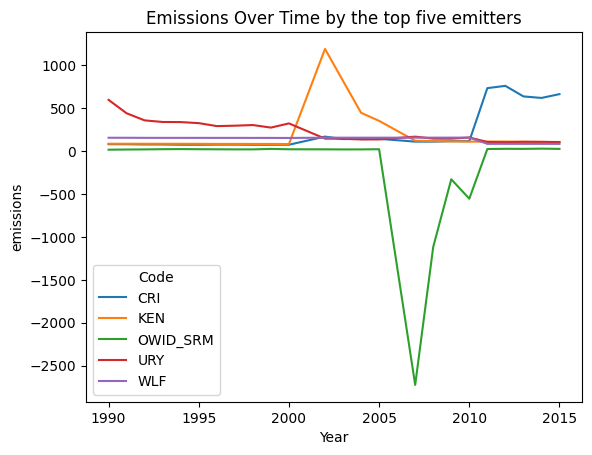

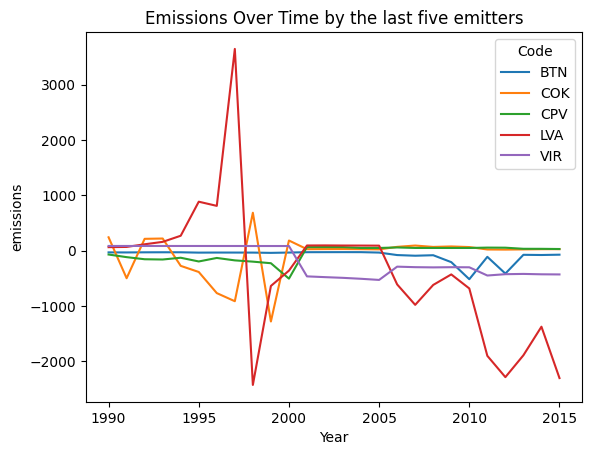

In [211]:

sns.lineplot(data=new_data_by_year_f1[(new_data_by_year_f1['Year']!=2001) & (new_data_by_year_f1['Year']!=2006)], x='Year', y='emissions', hue='Code')
plt.title('Emissions Over Time by the top five emitters')
plt.show()

sns.lineplot(data=new_data_by_year_l1, x='Year', y='emissions', hue='Code')
plt.title('Emissions Over Time by the last five emitters')
plt.show()

In [204]:
new_data_by_year_f1

,Year,Code,emissions
0,1990,CRI,82.177746
1,1990,KEN,87.596545
2,1990,OWID_SRM,18.067148
3,1990,URY,598.951357
4,1990,WLF,157.302864
...,...,...,...
125,2015,CRI,666.095178
126,2015,KEN,104.216175
127,2015,OWID_SRM,27.514131
128,2015,URY,107.376406


In [19]:
regression = data[['Year', 'emissions']]


In [23]:
corr = regression['Year'].corr(regression['emissions'])
print('La correlación entre año y emisiones es: ', corr)

La correlación entre año y emisiones es:  0.008986847753146947


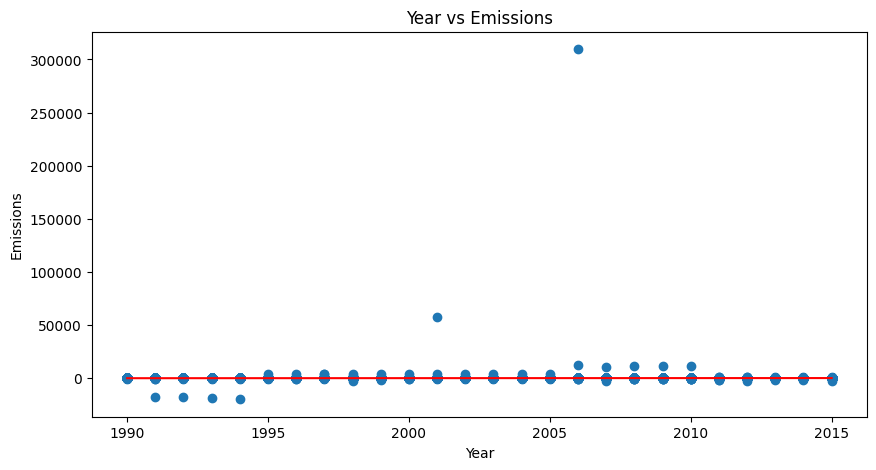

In [26]:


# Calculate the best fit line
m, b = np.polyfit(regression['Year'], regression['emissions'], 1)

# Create the scatter plot
plt.figure(figsize=(10,5))
plt.scatter(regression['Year'], regression['emissions'])

# Add the best fit line
plt.plot(regression['Year'], m*regression['Year'] + b, color='red')

plt.title('Year vs Emissions')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.show()


<AxesSubplot:>

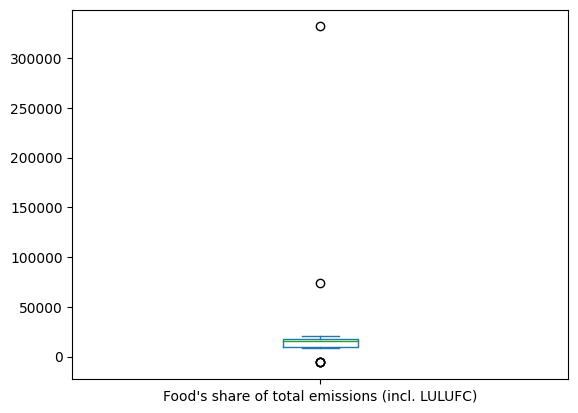

In [27]:
emissions_by_year["Food\'s share of total emissions (incl. LULUFC)"].plot(kind='box')

In [30]:
emissions_by_country = data.groupby('Entity')["emissions"].sum()

In [31]:
africa = pd.read_csv('africa.csv', delimiter=";")
asia = pd.read_csv('asia.csv', delimiter=";")
europa = pd.read_csv('europa.csv', delimiter=";")
oceania = pd.read_csv('oceania.csv', delimiter=";")
norteamerica = pd.read_csv('norteamerica.csv', delimiter=";")
sudamerica = pd.read_csv('sudamerica.csv', delimiter=";")

In [32]:
africa['Territory'] = 'africa'
asia['Territory'] = 'asia'
europa['Territory'] = 'europa'
oceania['Territory'] = 'oceania'
norteamerica['Territory'] = 'norteamerica'
sudamerica['Territory'] = 'sudamerica'

In [33]:
regions = pd.concat([africa, asia, europa, oceania, norteamerica, sudamerica])

In [39]:
regions.to_csv('regiones.csv',sep=',')

In [44]:
regions.rename(columns={'ISO-3166-3\r\n(3 Letter Country Code)': 'Code'}, inplace=True)


In [46]:
code_territory = regions[['Code', 'Territory']]

In [47]:
new_data = pd.merge(data, code_territory, on='Code', how='inner')

In [69]:
territory_year = new_data.groupby(['Year', 'Territory'])['emissions'].sum()
territory_year

Year  Territory   
1990  africa          4243.253274
      asia            2014.535401
      europa          1318.401376
      norteamerica    1714.809789
      oceania         2335.486634
                         ...     
2015  asia            1583.516214
      europa         -1053.468928
      norteamerica    1534.157236
      oceania         1081.088447
      sudamerica      1186.884124
Name: emissions, Length: 156, dtype: float64

In [72]:
new_df = territory_year.reset_index()

In [75]:
new_df

,Year,Territory,emissions
0,1990,africa,4243.253274
1,1990,asia,2014.535401
2,1990,europa,1318.401376
3,1990,norteamerica,1714.809789
4,1990,oceania,2335.486634
...,...,...,...
151,2015,asia,1583.516214
152,2015,europa,-1053.468928
153,2015,norteamerica,1534.157236
154,2015,oceania,1081.088447


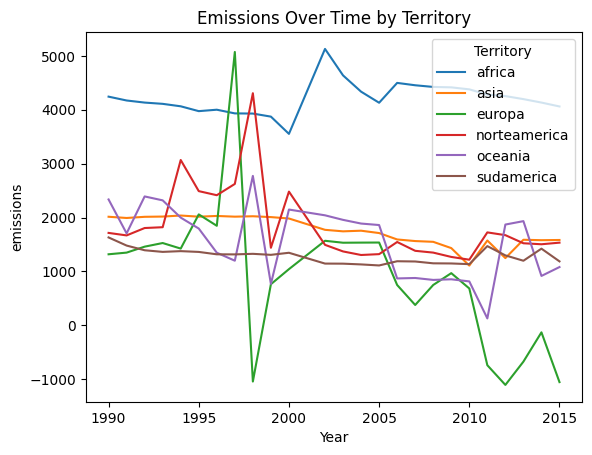

In [74]:


sns.lineplot(data=new_df[new_df['Year']!=2001], x='Year', y='emissions', hue='Territory')
plt.title('Emissions Over Time by Territory')
plt.show()

Si descontamos el año 2001 el cual es un año atípico para africa se puede observar como han ido cambiando la cantidad de emisiones por cada uno de los continentes

#### Encontrar cual es la región que más ha bajado su cantidad de emisiones

In [82]:
emissions1990 = new_df[(new_df['Year']==1990 ) ]
emissions2015 = new_df[(new_df['Year']==2015)]

In [93]:
first_last = pd.merge(emissions1990, emissions2015, on='Territory')
first_last['change'] = (first_last['emissions_y'] - first_last['emissions_x'])*100 / first_last['emissions_x']
first_last = first_last.sort_values('change', ascending=False)
first_last['ratio'] = first_last['change'].apply(abs)

Text(0, 0.5, 'Percentage of decrement')

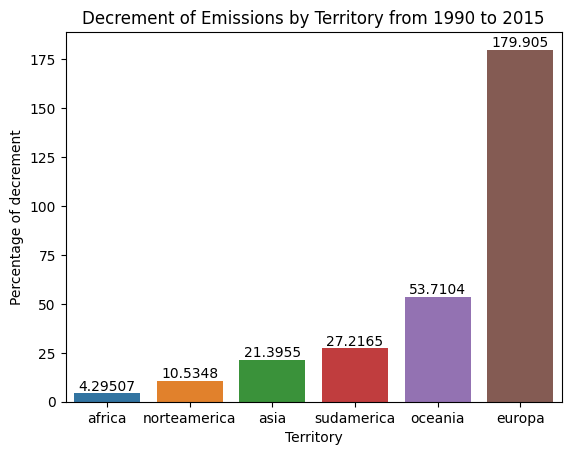

In [100]:
ax = sns.barplot(data=first_last, x='Territory', y='ratio')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Decrement of Emissions by Territory from 1990 to 2015')
plt.xlabel('Territory')
plt.ylabel('Percentage of decrement')

Como se puede observar europa tuvo el mayor decremento entre todos los territorios por mucho

In [101]:
change =  new_df[(new_df['Year']==1990 ) | (new_df['Year']==2015)]

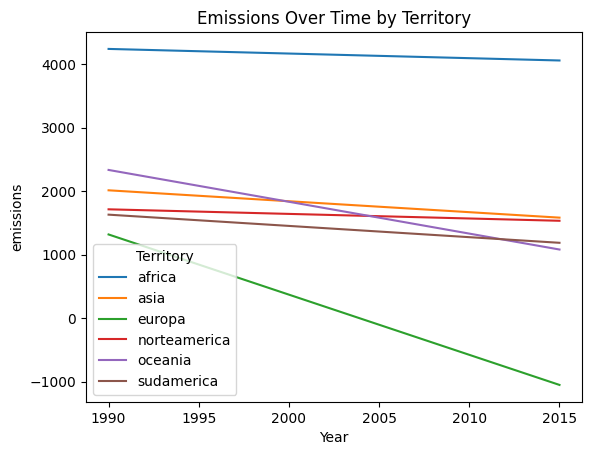

In [102]:
sns.lineplot(data=change, x='Year', y='emissions', hue='Territory')
plt.title('Change in emissions from 1990 to 2015')
plt.show()

### Ahora veamos como todo esto se compara a guatemala

In [115]:
emisiones_guate = data[data['Code']=='GTM'].reset_index().drop(columns=['index'])


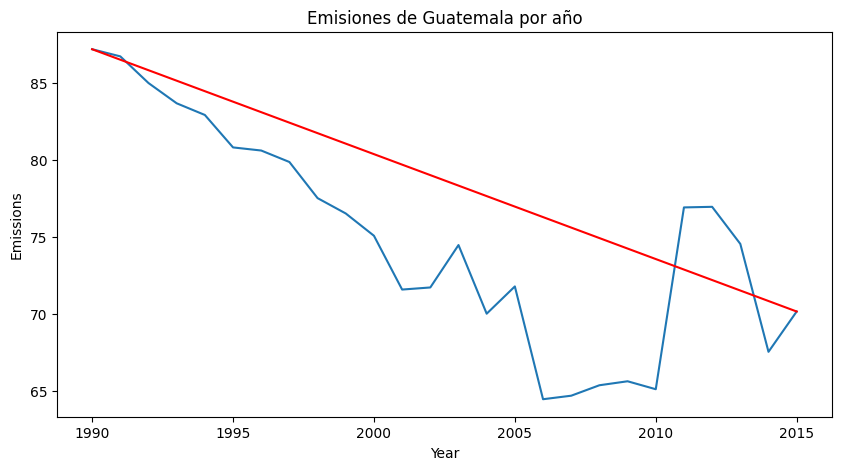

porcentaje de decremento entre 1990 a 2015 en Guatemala:  -19.55%


In [143]:
emisiones_guate.sort_values('Year', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(emisiones_guate['Year'], emisiones_guate['emissions'])
plt.plot(emisiones_guate[(emisiones_guate['Year']==1990) | (emisiones_guate['Year']==2015)]['Year'], emisiones_guate[(emisiones_guate['Year']==1990) | (emisiones_guate['Year']==2015)]['emissions'], color='red')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Emisiones de Guatemala por año')
plt.show()
eguat1990 =  emisiones_guate[emisiones_guate['Year']==1990]
eguat2015 =  emisiones_guate[emisiones_guate['Year']==2015]

guat_first_last = pd.merge(eguat1990, eguat2015, on='Code').reset_index()
guat_first_last['cambio'] = (guat_first_last['emissions_y'])
guat_first_last['cambio'] = (guat_first_last['cambio'] - guat_first_last['emissions_x'])*100
guat_first_last['cambio'] = guat_first_last['cambio']/guat_first_last['emissions_x']

print('porcentaje de decremento entre 1990 a 2015 en Guatemala: ', f"{guat_first_last['cambio'][0]:.2f}%")

### Veamos como esto se compara con america latina

In [158]:
latam = pd.read_csv('latam.csv', delimiter=";")

In [159]:
latam.columns

Index(['Country / Territory', 'ISO-3166-2\r\n(2 Letter Country Code)',
       'ISO-3166-3\r\n(3 Letter Country Code)',
       'ccTLD\r\n(Country Domain Extension)'],
      dtype='object')

In [160]:
latam.drop(columns=['ISO-3166-2\r\n(2 Letter Country Code)', 'ccTLD\r\n(Country Domain Extension)'], inplace=True)

In [161]:
latam

,Country / Territory,ISO-3166-3\r\n(3 Letter Country Code)
0,Argentina,ARG
1,Bolivia,BOL
2,Brazil,BRA
3,Chile,CHL
4,Colombia,COL
5,Ecuador,ECU
6,Guyana,GUY
7,Paraguay,PRY
8,Peru,PER
9,Suriname,SUR


In [162]:
latam = new_data[new_data['Code'].isin(latam['ISO-3166-3\r\n(3 Letter Country Code)'])]


In [170]:
pie_latam = latam.groupby(['Code'])['emissions'].sum()
pie_latam = pie_latam.reset_index()

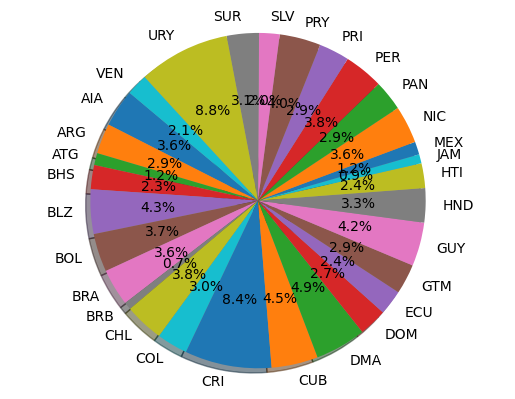

In [173]:

plt.pie(pie_latam['emissions'], labels=pie_latam['Code'],
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [164]:
latam_territory_year = latam.groupby(['Year', 'Code'])['emissions'].sum()
latam_territory_year

Year  Code
1990  AIA     -39.711884
      ARG      81.231668
      ATG      33.514895
      BHS      87.309361
      BLZ     138.009483
                 ...    
2015  PRY     100.498098
      SLV      48.617712
      SUR      78.788923
      URY     107.376406
      VEN      48.114756
Name: emissions, Length: 780, dtype: float64

In [165]:
latam_new_df = latam_territory_year.reset_index()

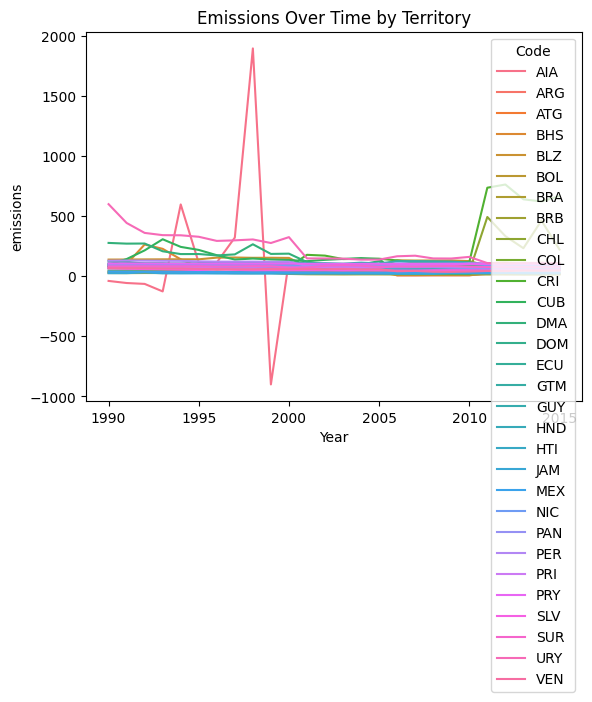

In [166]:
sns.lineplot(data=latam_new_df, x='Year', y='emissions', hue='Code')
plt.title('Emissions Over Time by Territory')
plt.show()

In [175]:
latamemissions1990 = latam_new_df[(latam_new_df['Year']==1990)]
latamemissions2015 = latam_new_df[(latam_new_df['Year']==2015)]

In [176]:
latam_first_last = pd.merge(latamemissions1990, latamemissions2015, on='Code')
latam_first_last['change'] = (latam_first_last['emissions_y'] - latam_first_last['emissions_x'])*100 / latam_first_last['emissions_x']
latam_first_last = latam_first_last.sort_values('change', ascending=False)
latam_first_last['ratio'] = latam_first_last['change'].apply(abs)

In [185]:
latam_first_last.reset_index()

,index,Year_x,Code,emissions_x,Year_y,emissions_y,change,ratio
0,10,1990,CRI,82.177746,2015,666.095178,710.554207,710.554207
1,8,1990,CHL,44.105755,2015,221.995860,403.326293,403.326293
2,24,1990,PRI,70.236395,2015,75.072332,6.885230,6.885230
3,27,1990,SUR,80.913516,2015,78.788923,-2.625758,2.625758
4,25,1990,PRY,105.570814,2015,100.498098,-4.805036,4.805036
5,21,1990,NIC,94.343268,2015,88.614318,-6.072452,6.072452
6,5,1990,BOL,89.195760,2015,83.383841,-6.515914,6.515914
7,16,1990,GUY,107.160753,2015,99.092733,-7.528895,7.528895
8,19,1990,JAM,24.879503,2015,22.885493,-8.014673,8.014673
9,14,1990,ECU,64.400287,2015,53.820771,-16.427748,16.427748


Text(0, 0.5, 'Percentage of change')

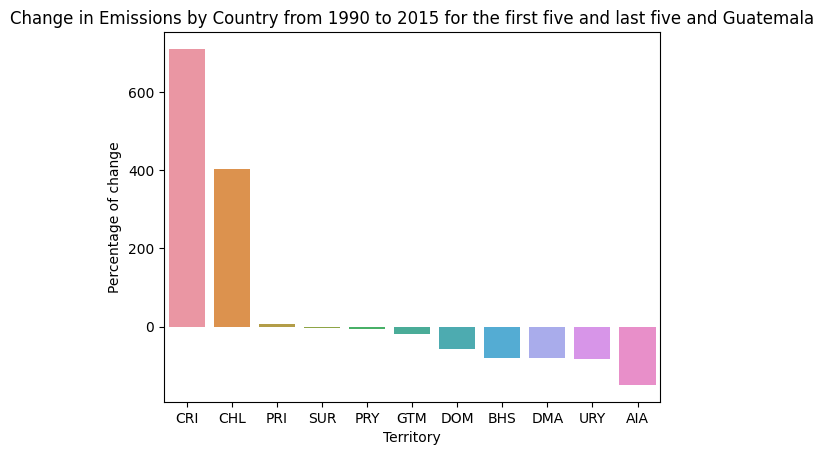

In [191]:
latam_first_last
first_five = latam_first_last.head(5)
guate = latam_first_last[latam_first_last['Code']=='GTM']
last_five = latam_first_last.tail(5)
reduced_barplot = pd.concat([first_five, guate, last_five])
sns.barplot(reduced_barplot, x="Code", y='change')

plt.title('Change in Emissions by Country from 1990 to 2015 for the first five and last five and Guatemala')
plt.xlabel('Territory')
plt.ylabel('Percentage of change')

In [187]:
change_latam =  latam_new_df[(latam_new_df['Year']==1990 ) | (latam_new_df['Year']==2015)]

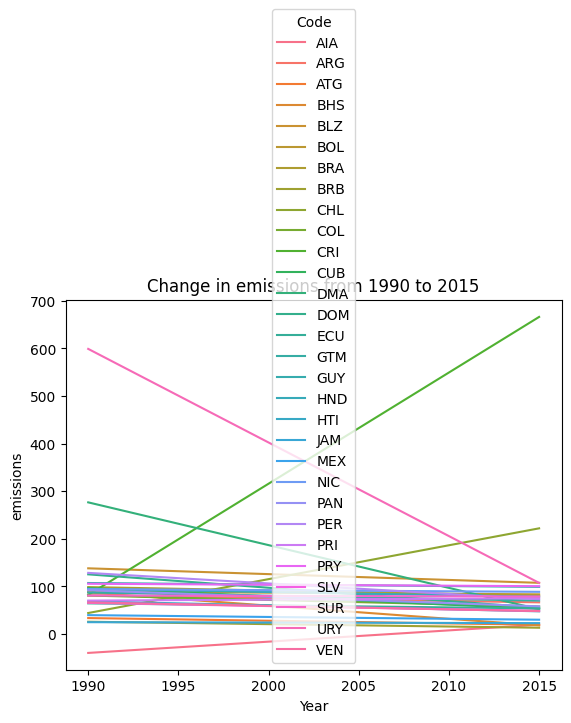

In [188]:
sns.lineplot(data=change_latam, x='Year', y='emissions', hue='Code')
plt.title('Change in emissions from 1990 to 2015')
plt.show()